# Модель для предсказания оптимальной температуры обработки стали

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Модель-для-предсказания-оптимальной-температуры-обработки-стали" data-toc-modified-id="Модель-для-предсказания-оптимальной-температуры-обработки-стали-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Модель для предсказания оптимальной температуры обработки стали</a></span><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Описание проекта</a></span><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Открытие-и-изучение-файлов-с-данными" data-toc-modified-id="Открытие-и-изучение-файлов-с-данными-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Открытие и изучение файлов с данными</a></span></li><li><span><a href="#Объединение-таблиц" data-toc-modified-id="Объединение-таблиц-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Объединение таблиц</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Построение,-выбор-и-улучшение-модели" data-toc-modified-id="Построение,-выбор-и-улучшение-модели-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Построение, выбор и улучшение модели</a></span><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Выбор-модели" data-toc-modified-id="Выбор-модели-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Выбор модели</a></span></li><li><span><a href="#Изучение-features_importances" data-toc-modified-id="Изучение-features_importances-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Изучение features_importances</a></span></li><li><span><a href="#Подбор-параметров-лучшей-модели-с-GridSearchCv" data-toc-modified-id="Подбор-параметров-лучшей-модели-с-GridSearchCv-1.3.4"><span class="toc-item-num">1.3.4&nbsp;&nbsp;</span>Подбор параметров лучшей модели с GridSearchCv</a></span></li><li><span><a href="#Сравнение-с-константной-моделью" data-toc-modified-id="Сравнение-с-константной-моделью-1.3.5"><span class="toc-item-num">1.3.5&nbsp;&nbsp;</span>Сравнение с константной моделью</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li></ul></div>

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Описание проекта

Для оптимизации производственных расходов, металлургический комбинат планирует уменьшить потребление электроэнергии на этапе обработки стали. Задача проекта - построить модель, которая предскажет оптимальную температуру обработки стали. 
__Критерий качества, установленный заказчиком: MAE <= 6__

Сталь обрабатывают в металлическом ковше, облицованном огнеупорным кирпичом. Расплавленную сталь заливают в ковш и подогревают до нужной температуры графитовыми электродами, установленными в крышке ковша. 

Из сплава выводится сера (процесс десульфурации), добавлением примесей корректируется химический состав и отбираются пробы. Состав стали изменяют, подавая куски сплава из бункера для сыпучих материалов или проволоку через трайб-аппарат (процесс легирования стали).

Перед введением легирующих добавок измеряют температуру стали и производят её химический анализ. Потом температуру на несколько минут повышают, добавляют легирующие материалы и продувают сплав инертным газом. Затем его перемешивают и снова проводят измерения. Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки.

В конце цикла расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки, откуда готовый продукт выходит в виде заготовок-слябов.

### Описание данных

Данные представлены несколькими разрозненными файлами с идентификатором-ключом `key` по номеру партии (ключ может повторяться в разных итерациях обработки одной и той же партии).

- `data_arc.csv` — данные об электродах;
- `data_bulk.csv` — данные о подаче сыпучих материалов (объём);
- `data_bulk_time.csv` — данные о подаче сыпучих материалов (время);
- `data_gas.csv` — данные о продувке сплава газом;
- `data_temp.csv` — результаты измерения температуры;
- `data_wire.csv` — данные о проволочных материалах (объём);
- `data_wire_time.csv` — данные о проволочных материалах (время).


### Открытие и изучение файлов с данными
Импортируем необходимые библиотелки, загрузим и изучим файлы.

In [2]:
import pandas as pd
import numpy as np
from numpy.random import RandomState
from matplotlib import pyplot as plt
import seaborn as sns

import scipy.stats as stats
from time import time

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb

from sklearn.linear_model import Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_absolute_error

from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict

from sklearn.metrics import make_scorer

import os 
import warnings
from sklearn.model_selection import GridSearchCV

In [3]:
data_arc = pd.read_csv('data_arc.csv')
data_bulk = pd.read_csv('data_bulk.csv')
data_bulk_time = pd.read_csv('data_bulk_time.csv')
data_gas = pd.read_csv('data_gas.csv')
data_temp =  pd.read_csv('data_temp.csv')
data_wire = pd.read_csv('data_wire.csv') 
data_wire_time = pd.read_csv('data_wire_time.csv')

In [4]:
def info(table):
    display(table.head(5))
    print('')
    print(table.info())
    print('')
    print('')
        
    print('Число дубликатов', table.duplicated().sum())
    print('')
    print('Число пропусков')
    print(table.isna().sum().sort_values(axis=0, ascending=False))
    print('')
    print('Всего пропусков')
    print(table.isna().sum().sum())
    print('')
    display(table.describe().T)
    print('')
    display(table.shape)

In [5]:
# Данные об электродах
info(data_arc)

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
key                     14876 non-null int64
Начало нагрева дугой    14876 non-null object
Конец нагрева дугой     14876 non-null object
Активная мощность       14876 non-null float64
Реактивная мощность     14876 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB
None


Число дубликатов 0

Число пропусков
Реактивная мощность     0
Активная мощность       0
Конец нагрева дугой     0
Начало нагрева дугой    0
key                     0
dtype: int64

Всего пропусков
0



,count,mean,std,min,25%,50%,75%,max
key,14876.0,1615.220422,934.571502,1.000000,806.000000,1617.000000,2429.000000,3241.000000
Активная мощность,14876.0,0.670441,0.408159,0.030002,0.395297,0.555517,0.857034,3.731596
Реактивная мощность,14876.0,0.452592,5.878702,-715.504924,0.290991,0.415962,0.637371,2.676388


(14876, 5)

In [6]:
data_arc['key'].value_counts()

2108    16
1689    15
1513    15
2567    14
322     13
        ..
614      1
1914     1
2025     1
2795     1
1568     1
Name: key, Length: 3214, dtype: int64

В таблице data_arc нет пропусков. Число партий - 3214. Данные, на первый взгляд, пригодны для дальнейшего использования в анализе.
Добавим в таблицу расчетные поля со временем нагрева и общей мощностью. Общую мощность рассчитаем по формуле корня квадратного из суммы квадратов мощностей.

In [7]:
data_arc['Конец нагрева дугой'] = pd.to_datetime(data_arc['Конец нагрева дугой'])
data_arc['Начало нагрева дугой'] = pd.to_datetime(data_arc['Начало нагрева дугой'])
data_arc['heat_time'] = (data_arc['Конец нагрева дугой'] - data_arc['Начало нагрева дугой'])/np.timedelta64(1,'s')

data_arc['total_power'] = ((data_arc['Активная мощность'])**2 + (data_arc['Реактивная мощность'])**2)**0.5

data_arc.head()

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность,heat_time,total_power
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084,228.0,1.193639
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285,185.0,0.959010
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805,172.0,0.896038
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669,365.0,1.970470
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397,148.0,0.807239


Теперь сгруппируем данные по партиям, просуммировав значения мощностей и нагрева

In [8]:
power = data_arc.pivot_table(index = 'key', values = ['Активная мощность', 'Реактивная мощность', 'heat_time', 'total_power'], aggfunc='sum')
power

,heat_time,total_power,Активная мощность,Реактивная мощность
key,,,,
1,1098.0,5.826395,4.878147,3.183241
2,811.0,3.649216,3.052598,1.998112
3,655.0,2.989534,2.525882,1.599076
4,741.0,3.814962,3.209250,2.060298
5,869.0,4.035758,3.347173,2.252643
...,...,...,...,...
3237,909.0,4.844982,3.932467,2.828459
3238,546.0,2.696542,2.106529,1.681182
3239,1216.0,5.611883,4.666754,3.111617


In [9]:
# данные о подаче сыпучих материалов (объём);

info(data_bulk)

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
key        3129 non-null int64
Bulk 1     252 non-null float64
Bulk 2     22 non-null float64
Bulk 3     1298 non-null float64
Bulk 4     1014 non-null float64
Bulk 5     77 non-null float64
Bulk 6     576 non-null float64
Bulk 7     25 non-null float64
Bulk 8     1 non-null float64
Bulk 9     19 non-null float64
Bulk 10    176 non-null float64
Bulk 11    177 non-null float64
Bulk 12    2450 non-null float64
Bulk 13    18 non-null float64
Bulk 14    2806 non-null float64
Bulk 15    2248 non-null float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB
None


Число дубликатов 0

Число пропусков
Bulk 8     3128
Bulk 13    3111
Bulk 9     3110
Bulk 2     3107
Bulk 7     3104
Bulk 5     3052
Bulk 10    2953
Bulk 11    2952
Bulk 1     2877
Bulk 6     2553
Bulk 4     2115
Bulk 3     1831
Bulk 15     881
Bulk 12     679
Bulk 14     323
key           0
dtype: int64

Всего пропусков
3

,count,mean,std,min,25%,50%,75%,max
key,3129.0,1624.383509,933.337642,1.0,816.00,1622.0,2431.00,3241.0
Bulk 1,252.0,39.242063,18.277654,10.0,27.00,31.0,46.00,185.0
Bulk 2,22.0,253.045455,21.180578,228.0,242.00,251.5,257.75,325.0
Bulk 3,1298.0,113.879045,75.483494,6.0,58.00,97.5,152.00,454.0
Bulk 4,1014.0,104.394477,48.184126,12.0,72.00,102.0,133.00,281.0
Bulk 5,77.0,107.025974,81.790646,11.0,70.00,86.0,132.00,603.0
Bulk 6,576.0,118.925347,72.057776,17.0,69.75,100.0,157.00,503.0
Bulk 7,25.0,305.600000,191.022904,47.0,155.00,298.0,406.00,772.0
Bulk 8,1.0,49.000000,NaN,49.0,49.00,49.0,49.00,49.0
Bulk 9,19.0,76.315789,21.720581,63.0,66.00,68.0,70.50,147.0


(3129, 16)

Судя по длине таблицы, часть партий не имела сыпучих материалов. В данных большое количество пропусков. Для дальнейшего исследования создадим агрегирующий столбец с суммой сыпучих добавок и будем использовать его, заменив пропуски на нули.

In [10]:
data_bulk = data_bulk.fillna(0)
data_bulk['bulk_sum'] = (data_bulk['Bulk 1'] + data_bulk['Bulk 2'] + data_bulk['Bulk 3'] + data_bulk['Bulk 4'] +
                        data_bulk['Bulk 5'] + data_bulk['Bulk 6'] + data_bulk['Bulk 7'] + data_bulk['Bulk 8'] +
                         data_bulk['Bulk 9'] + data_bulk['Bulk 10'] + data_bulk['Bulk 11'] +
                         data_bulk['Bulk 12'] + data_bulk['Bulk 13'] + data_bulk['Bulk 14'] + data_bulk['Bulk 15'])

info(data_bulk)

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15,bulk_sum
0,1,0.0,0.0,0.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,150.0,154.0,553.0
1,2,0.0,0.0,0.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,149.0,154.0,582.0
2,3,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0,0.0,152.0,153.0,544.0
3,4,0.0,0.0,0.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,207.0,0.0,153.0,154.0,595.0
4,5,0.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203.0,0.0,151.0,152.0,584.0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 17 columns):
key         3129 non-null int64
Bulk 1      3129 non-null float64
Bulk 2      3129 non-null float64
Bulk 3      3129 non-null float64
Bulk 4      3129 non-null float64
Bulk 5      3129 non-null float64
Bulk 6      3129 non-null float64
Bulk 7      3129 non-null float64
Bulk 8      3129 non-null float64
Bulk 9      3129 non-null float64
Bulk 10     3129 non-null float64
Bulk 11     3129 non-null float64
Bulk 12     3129 non-null float64
Bulk 13     3129 non-null float64
Bulk 14     3129 non-null float64
Bulk 15     3129 non-null float64
bulk_sum    3129 non-null float64
dtypes: float64(16), int64(1)
memory usage: 415.7 KB
None


Число дубликатов 0

Число пропусков
bulk_sum    0
Bulk 7      0
Bulk 1      0
Bulk 2      0
Bulk 3      0
Bulk 4      0
Bulk 5      0
Bulk 6      0
Bulk 8      0
Bulk 15     0
Bulk 9      0
Bulk 10     0
Bulk 11     0
Bulk 12     0
Bulk 13     0
Bulk 14   

,count,mean,std,min,25%,50%,75%,max
key,3129.0,1624.383509,933.337642,1.0,816.0,1622.0,2431.0,3241.0
Bulk 1,3129.0,3.160435,11.869164,0.0,0.0,0.0,0.0,185.0
Bulk 2,3129.0,1.779163,21.217878,0.0,0.0,0.0,0.0,325.0
Bulk 3,3129.0,47.240332,74.239954,0.0,0.0,0.0,80.0,454.0
Bulk 4,3129.0,33.830617,56.034505,0.0,0.0,0.0,68.0,281.0
Bulk 5,3129.0,2.633749,20.918138,0.0,0.0,0.0,0.0,603.0
Bulk 6,3129.0,21.892298,55.492582,0.0,0.0,0.0,0.0,503.0
Bulk 7,3129.0,2.441675,31.944063,0.0,0.0,0.0,0.0,772.0
Bulk 8,3129.0,0.015660,0.875978,0.0,0.0,0.0,0.0,49.0
Bulk 9,3129.0,0.463407,6.154398,0.0,0.0,0.0,0.0,147.0


(3129, 17)

Таблица подготовлена для дальнейшего использования

In [11]:
# данные о подаче сыпучих материалов (время);

info(data_bulk_time)

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:21:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:03:52,NaN,2019-05-03 11:03:52,2019-05-03 11:03:52
1,2,NaN,NaN,NaN,2019-05-03 11:46:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:40:20,NaN,2019-05-03 11:40:20,2019-05-03 11:40:20
2,3,NaN,NaN,NaN,2019-05-03 12:31:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:09:40,NaN,2019-05-03 12:09:40,2019-05-03 12:09:40
3,4,NaN,NaN,NaN,2019-05-03 12:48:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:41:24,NaN,2019-05-03 12:41:24,2019-05-03 12:41:24
4,5,NaN,NaN,NaN,2019-05-03 13:18:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:12:56,NaN,2019-05-03 13:12:56,2019-05-03 13:12:56



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
key        3129 non-null int64
Bulk 1     252 non-null object
Bulk 2     22 non-null object
Bulk 3     1298 non-null object
Bulk 4     1014 non-null object
Bulk 5     77 non-null object
Bulk 6     576 non-null object
Bulk 7     25 non-null object
Bulk 8     1 non-null object
Bulk 9     19 non-null object
Bulk 10    176 non-null object
Bulk 11    177 non-null object
Bulk 12    2450 non-null object
Bulk 13    18 non-null object
Bulk 14    2806 non-null object
Bulk 15    2248 non-null object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB
None


Число дубликатов 0

Число пропусков
Bulk 8     3128
Bulk 13    3111
Bulk 9     3110
Bulk 2     3107
Bulk 7     3104
Bulk 5     3052
Bulk 10    2953
Bulk 11    2952
Bulk 1     2877
Bulk 6     2553
Bulk 4     2115
Bulk 3     1831
Bulk 15     881
Bulk 12     679
Bulk 14     323
key           0
dtype: int64

Всего пропусков
35776



,count,mean,std,min,25%,50%,75%,max
key,3129.0,1624.383509,933.337642,1.0,816.0,1622.0,2431.0,3241.0


(3129, 16)

На текущем этапе непонятно, есть ли смысл в использовании этой таблицы (возможно, при более детальном анализе или на этапе моделирования потребуется к ней вернуться)

In [12]:
# данные о продувке сплава газом;

info(data_gas)

,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
key      3239 non-null int64
Газ 1    3239 non-null float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB
None


Число дубликатов 0

Число пропусков
Газ 1    0
key      0
dtype: int64

Всего пропусков
0



,count,mean,std,min,25%,50%,75%,max
key,3239.0,1621.861377,935.386334,1.000000,812.500000,1622.000000,2431.500000,3241.00000
Газ 1,3239.0,11.002062,6.220327,0.008399,7.043089,9.836267,13.769915,77.99504


(3239, 2)

Нет необходимости в модификации данных таблицы

In [13]:
# результаты измерения температуры;

info(data_temp)

,key,Время замера,Температура
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0
3,1,2019-05-03 11:30:01,1601.0
4,1,2019-05-03 11:30:39,1613.0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
key             15907 non-null int64
Время замера    15907 non-null object
Температура     13006 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 372.9+ KB
None


Число дубликатов 0

Число пропусков
Температура     2901
Время замера       0
key                0
dtype: int64

Всего пропусков
2901



,count,mean,std,min,25%,50%,75%,max
key,15907.0,1607.88087,942.212073,1.0,790.0,1618.0,2427.0,3241.0
Температура,13006.0,1591.84092,21.375851,1191.0,1581.0,1591.0,1601.0,1705.0


(15907, 3)

В поле температуры есть значительное количество пропусков. Посмотрим внимательнее на несколько партий

In [14]:
data_temp.head(20)

,key,Время замера,Температура
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0
3,1,2019-05-03 11:30:01,1601.0
4,1,2019-05-03 11:30:39,1613.0
5,2,2019-05-03 11:37:27,1581.0
6,2,2019-05-03 11:38:00,1577.0
7,2,2019-05-03 11:49:38,1589.0
8,2,2019-05-03 11:55:50,1604.0
9,2,2019-05-03 11:58:24,1608.0


Сагрегируем данные. В качестве значений возьмем разные варианты значений температуры. Чтобы в результаты не попали партии, в которых последний замер отсутствовал (=Nan), заменим предварительно пропуски на нули для последующей фильтрации

In [15]:
data_temp = data_temp.fillna(0)

temp_agg = data_temp.pivot_table(index = 'key', values='Температура', aggfunc=['first', 'last', 'count'])
temp_agg.columns = ['first_t', 'last_t', 'qty']
temp_agg

,first_t,last_t,qty
key,,,
1,1571.0,1613.0,5
2,1581.0,1602.0,6
3,1596.0,1599.0,5
4,1601.0,1625.0,3
5,1576.0,1602.0,2
...,...,...,...
3237,1569.0,0.0,5
3238,1584.0,0.0,3
3239,1598.0,0.0,8


In [16]:
temp_agg[temp_agg['last_t'] == 0]

,first_t,last_t,qty
key,,,
2500,1539.0,0.0,4
2501,1587.0,0.0,5
2502,1583.0,0.0,7
2503,1603.0,0.0,4
2504,1583.0,0.0,3
...,...,...,...
3237,1569.0,0.0,5
3238,1584.0,0.0,3
3239,1598.0,0.0,8


In [17]:
temp_agg = temp_agg[temp_agg['last_t'] > 1]
temp_agg

,first_t,last_t,qty
key,,,
1,1571.0,1613.0,5
2,1581.0,1602.0,6
3,1596.0,1599.0,5
4,1601.0,1625.0,3
5,1576.0,1602.0,2
...,...,...,...
2495,1570.0,1591.0,3
2496,1554.0,1591.0,4
2497,1571.0,1589.0,2


Удалим партии, в которых был только один замер

In [18]:
temp_agg[temp_agg['qty'] == 1]

,first_t,last_t,qty
key,,,
195,1583.0,1583.0,1
279,1603.0,1603.0,1


In [19]:
temp_agg = temp_agg[temp_agg['qty'] > 1]

In [20]:
temp_agg

,first_t,last_t,qty
key,,,
1,1571.0,1613.0,5
2,1581.0,1602.0,6
3,1596.0,1599.0,5
4,1601.0,1625.0,3
5,1576.0,1602.0,2
...,...,...,...
2495,1570.0,1591.0,3
2496,1554.0,1591.0,4
2497,1571.0,1589.0,2


Получили итоговую агрегированную таблицу с температурами для партий. __Поле last_t далее будем считать нашей целевой переменной.__

In [21]:
# данные о проволочных материалах (объём);

info(data_wire)

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
key       3081 non-null int64
Wire 1    3055 non-null float64
Wire 2    1079 non-null float64
Wire 3    63 non-null float64
Wire 4    14 non-null float64
Wire 5    1 non-null float64
Wire 6    73 non-null float64
Wire 7    11 non-null float64
Wire 8    19 non-null float64
Wire 9    29 non-null float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB
None


Число дубликатов 0

Число пропусков
Wire 5    3080
Wire 7    3070
Wire 4    3067
Wire 8    3062
Wire 9    3052
Wire 3    3018
Wire 6    3008
Wire 2    2002
Wire 1      26
key          0
dtype: int64

Всего пропусков
23385



,count,mean,std,min,25%,50%,75%,max
key,3081.0,1623.426485,932.996726,1.000000,823.000000,1619.000000,2434.000000,3241.000000
Wire 1,3055.0,100.895853,42.012518,1.918800,72.115684,100.158234,126.060484,330.314424
Wire 2,1079.0,50.577323,39.320216,0.030160,20.193680,40.142956,70.227558,282.780152
Wire 3,63.0,189.482681,99.513444,0.144144,95.135044,235.194977,276.252014,385.008668
Wire 4,14.0,57.442841,28.824667,24.148801,40.807002,45.234282,76.124619,113.231044
Wire 5,1.0,15.132000,NaN,15.132000,15.132000,15.132000,15.132000,15.132000
Wire 6,73.0,48.016974,33.919845,0.034320,25.053600,42.076324,64.212723,180.454575
Wire 7,11.0,10.039007,8.610584,0.234208,6.762756,9.017009,11.886057,32.847674
Wire 8,19.0,53.625193,16.881728,45.076721,46.094879,46.279999,48.089603,102.762401
Wire 9,29.0,34.155752,19.931616,4.622800,22.058401,30.066399,43.862003,90.053604


(3081, 10)

По аналогии с таблицей сыпучих добавок просуммируем добавки проволоки

In [22]:
data_wire = data_wire.fillna(0)
data_wire['wire_sum'] = (data_wire['Wire 1'] + data_wire['Wire 2'] + data_wire['Wire 3'] + data_wire['Wire 4'] +
                        data_wire['Wire 5'] + data_wire['Wire 6'] + data_wire['Wire 7'] + data_wire['Wire 8'] +
                         data_wire['Wire 9'])

info(data_wire)

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9,wire_sum
0,1,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.059998
1,2,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96.052315
2,3,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91.160157
3,4,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89.063515
4,5,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98.352796



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 11 columns):
key         3081 non-null int64
Wire 1      3081 non-null float64
Wire 2      3081 non-null float64
Wire 3      3081 non-null float64
Wire 4      3081 non-null float64
Wire 5      3081 non-null float64
Wire 6      3081 non-null float64
Wire 7      3081 non-null float64
Wire 8      3081 non-null float64
Wire 9      3081 non-null float64
wire_sum    3081 non-null float64
dtypes: float64(10), int64(1)
memory usage: 264.9 KB
None


Число дубликатов 0

Число пропусков
wire_sum    0
Wire 9      0
Wire 8      0
Wire 7      0
Wire 6      0
Wire 5      0
Wire 4      0
Wire 3      0
Wire 2      0
Wire 1      0
key         0
dtype: int64

Всего пропусков
0



,count,mean,std,min,25%,50%,75%,max
key,3081.0,1623.426485,932.996726,1.0000,823.00000,1619.000000,2434.000000,3241.000000
Wire 1,3081.0,100.044411,42.841120,0.0000,70.28112,100.114563,125.798405,330.314424
Wire 2,3081.0,17.712733,33.517734,0.0000,0.00000,0.000000,23.162880,282.780152
Wire 3,3081.0,3.874524,30.310417,0.0000,0.00000,0.000000,0.000000,385.008668
Wire 4,3081.0,0.261019,4.293865,0.0000,0.00000,0.000000,0.000000,113.231044
Wire 5,3081.0,0.004911,0.272615,0.0000,0.00000,0.000000,0.000000,15.132000
Wire 6,3081.0,1.137695,8.958111,0.0000,0.00000,0.000000,0.000000,180.454575
Wire 7,3081.0,0.035842,0.774190,0.0000,0.00000,0.000000,0.000000,32.847674
Wire 8,3081.0,0.330697,4.392677,0.0000,0.00000,0.000000,0.000000,102.762401
Wire 9,3081.0,0.321492,3.806904,0.0000,0.00000,0.000000,0.000000,90.053604


(3081, 11)

Данные подготовлены

In [23]:
# данные о проволочных материалах (время)

info(data_wire_time)

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:11:41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:46:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:13:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:48:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:18:15,2019-05-03 13:32:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
key       3081 non-null int64
Wire 1    3055 non-null object
Wire 2    1079 non-null object
Wire 3    63 non-null object
Wire 4    14 non-null object
Wire 5    1 non-null object
Wire 6    73 non-null object
Wire 7    11 non-null object
Wire 8    19 non-null object
Wire 9    29 non-null object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB
None


Число дубликатов 0

Число пропусков
Wire 5    3080
Wire 7    3070
Wire 4    3067
Wire 8    3062
Wire 9    3052
Wire 3    3018
Wire 6    3008
Wire 2    2002
Wire 1      26
key          0
dtype: int64

Всего пропусков
23385



,count,mean,std,min,25%,50%,75%,max
key,3081.0,1623.426485,932.996726,1.0,823.0,1619.0,2434.0,3241.0


(3081, 10)

Данные этой таблицы на текущем этапе также использовать не будем.

Далее нам нужно будет сделать сводную таблицу, содержащую данные из исходных таблиц по ключу key, а в полученной таблице проводить EDA и далее идти по намеченному плану или его корректировать с учетом результатов.

### Объединение таблиц

Соединим нужные нам таблицы по номерам партий. За основу возьмем таблицу с целевой переменной, то есть `temp_agg`.

In [24]:
data = temp_agg.merge(power, on='key', how='left').merge(
    data_gas, on='key', how='left').merge(data_bulk, on='key', how='left').merge(data_wire, on='key', how='left')
data

,key,first_t,last_t,qty,heat_time,total_power,Активная мощность,Реактивная мощность,Газ 1,Bulk 1,...,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9,wire_sum
0,1,1571.0,1613.0,5,1098.0,5.826395,4.878147,3.183241,29.749986,0.0,...,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.059998
1,2,1581.0,1602.0,6,811.0,3.649216,3.052598,1.998112,12.555561,0.0,...,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96.052315
2,3,1596.0,1599.0,5,655.0,2.989534,2.525882,1.599076,28.554793,0.0,...,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91.160157
3,4,1601.0,1625.0,3,741.0,3.814962,3.209250,2.060298,18.841219,0.0,...,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89.063515
4,5,1576.0,1602.0,2,869.0,4.035758,3.347173,2.252643,5.413692,0.0,...,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98.352796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2470,2495,1570.0,1591.0,3,723.0,3.986869,3.210690,2.360777,7.125735,0.0,...,89.150879,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89.150879
2471,2496,1554.0,1591.0,4,940.0,5.057033,4.203064,2.810185,9.412616,0.0,...,114.179527,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,114.179527
2472,2497,1571.0,1589.0,2,569.0,2.885017,2.212379,1.851269,6.271699,0.0,...,94.086723,9.04800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,103.134723
2473,2498,1591.0,1594.0,5,750.0,4.143749,3.408725,2.355428,14.953657,0.0,...,118.110717,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118.110717


In [25]:
data_short = temp_agg.merge(power, on='key', how='left').merge(
    data_gas, on='key', how='left').merge(data_bulk[['key', 'bulk_sum']], on='key', how='left').merge(data_wire[['key','wire_sum']], on='key', how='left')

data_short

,key,first_t,last_t,qty,heat_time,total_power,Активная мощность,Реактивная мощность,Газ 1,bulk_sum,wire_sum
0,1,1571.0,1613.0,5,1098.0,5.826395,4.878147,3.183241,29.749986,553.0,60.059998
1,2,1581.0,1602.0,6,811.0,3.649216,3.052598,1.998112,12.555561,582.0,96.052315
2,3,1596.0,1599.0,5,655.0,2.989534,2.525882,1.599076,28.554793,544.0,91.160157
3,4,1601.0,1625.0,3,741.0,3.814962,3.209250,2.060298,18.841219,595.0,89.063515
4,5,1576.0,1602.0,2,869.0,4.035758,3.347173,2.252643,5.413692,584.0,98.352796
...,...,...,...,...,...,...,...,...,...,...,...
2470,2495,1570.0,1591.0,3,723.0,3.986869,3.210690,2.360777,7.125735,719.0,89.150879
2471,2496,1554.0,1591.0,4,940.0,5.057033,4.203064,2.810185,9.412616,796.0,114.179527
2472,2497,1571.0,1589.0,2,569.0,2.885017,2.212379,1.851269,6.271699,665.0,103.134723
2473,2498,1591.0,1594.0,5,750.0,4.143749,3.408725,2.355428,14.953657,733.0,118.110717


In [26]:
info(data_short)

,key,first_t,last_t,qty,heat_time,total_power,Активная мощность,Реактивная мощность,Газ 1,bulk_sum,wire_sum
0,1,1571.0,1613.0,5,1098.0,5.826395,4.878147,3.183241,29.749986,553.0,60.059998
1,2,1581.0,1602.0,6,811.0,3.649216,3.052598,1.998112,12.555561,582.0,96.052315
2,3,1596.0,1599.0,5,655.0,2.989534,2.525882,1.599076,28.554793,544.0,91.160157
3,4,1601.0,1625.0,3,741.0,3.814962,3.209250,2.060298,18.841219,595.0,89.063515
4,5,1576.0,1602.0,2,869.0,4.035758,3.347173,2.252643,5.413692,584.0,98.352796



<class 'pandas.core.frame.DataFrame'>
Int64Index: 2475 entries, 0 to 2474
Data columns (total 11 columns):
key                    2475 non-null int64
first_t                2475 non-null float64
last_t                 2475 non-null float64
qty                    2475 non-null int64
heat_time              2475 non-null float64
total_power            2475 non-null float64
Активная мощность      2475 non-null float64
Реактивная мощность    2475 non-null float64
Газ 1                  2473 non-null float64
bulk_sum               2407 non-null float64
wire_sum               2372 non-null float64
dtypes: float64(9), int64(2)
memory usage: 232.0 KB
None


Число дубликатов 0

Число пропусков
wire_sum               103
bulk_sum                68
Газ 1                    2
Реактивная мощность      0
Активная мощность        0
total_power              0
heat_time                0
qty                      0
last_t                   0
first_t                  0
key                      0
dtype: in

,count,mean,std,min,25%,50%,75%,max
key,2475.0,1250.787071,719.787271,1.000000,629.500000,1252.000000,1872.500000,2499.000000
first_t,2475.0,1588.402020,29.243044,1191.000000,1572.000000,1588.000000,1605.000000,1679.000000
last_t,2475.0,1595.336162,16.023153,1541.000000,1587.000000,1593.000000,1599.000000,1700.000000
qty,2475.0,4.955556,1.807323,2.000000,4.000000,5.000000,6.000000,16.000000
heat_time,2475.0,799.951919,340.784276,57.000000,573.000000,772.000000,986.500000,4189.000000
total_power,2475.0,4.198428,14.446209,0.257637,2.693640,3.758005,4.875827,717.137585
Активная мощность,2475.0,3.127628,1.425832,0.186226,2.148302,3.016373,3.908051,17.496497
Реактивная мощность,2475.0,2.041593,14.450978,-714.591636,1.607333,2.229479,2.905603,12.587990
Газ 1,2473.0,11.142960,6.323742,0.008399,7.105241,9.926730,13.872219,77.995040
bulk_sum,2407.0,603.766514,287.101451,19.000000,430.000000,604.000000,789.000000,3235.000000


(2475, 11)

В некоторых партиях есть пропуски в добавках bulk или wire - пока оставим их (не будем удалять), т.к. возможно такие партии могут повлиять на обучение моделей. Перейдем к исследовательскому анализу данных полученной таблицы.

## Исследовательский анализ данных

Для EDA будем использовать таблицу с суммарными присадками bulk и wire

1. Построим гистограммы распределений для потенциальных признаков

In [27]:
col_list = data_short.drop(columns='key').columns.tolist()

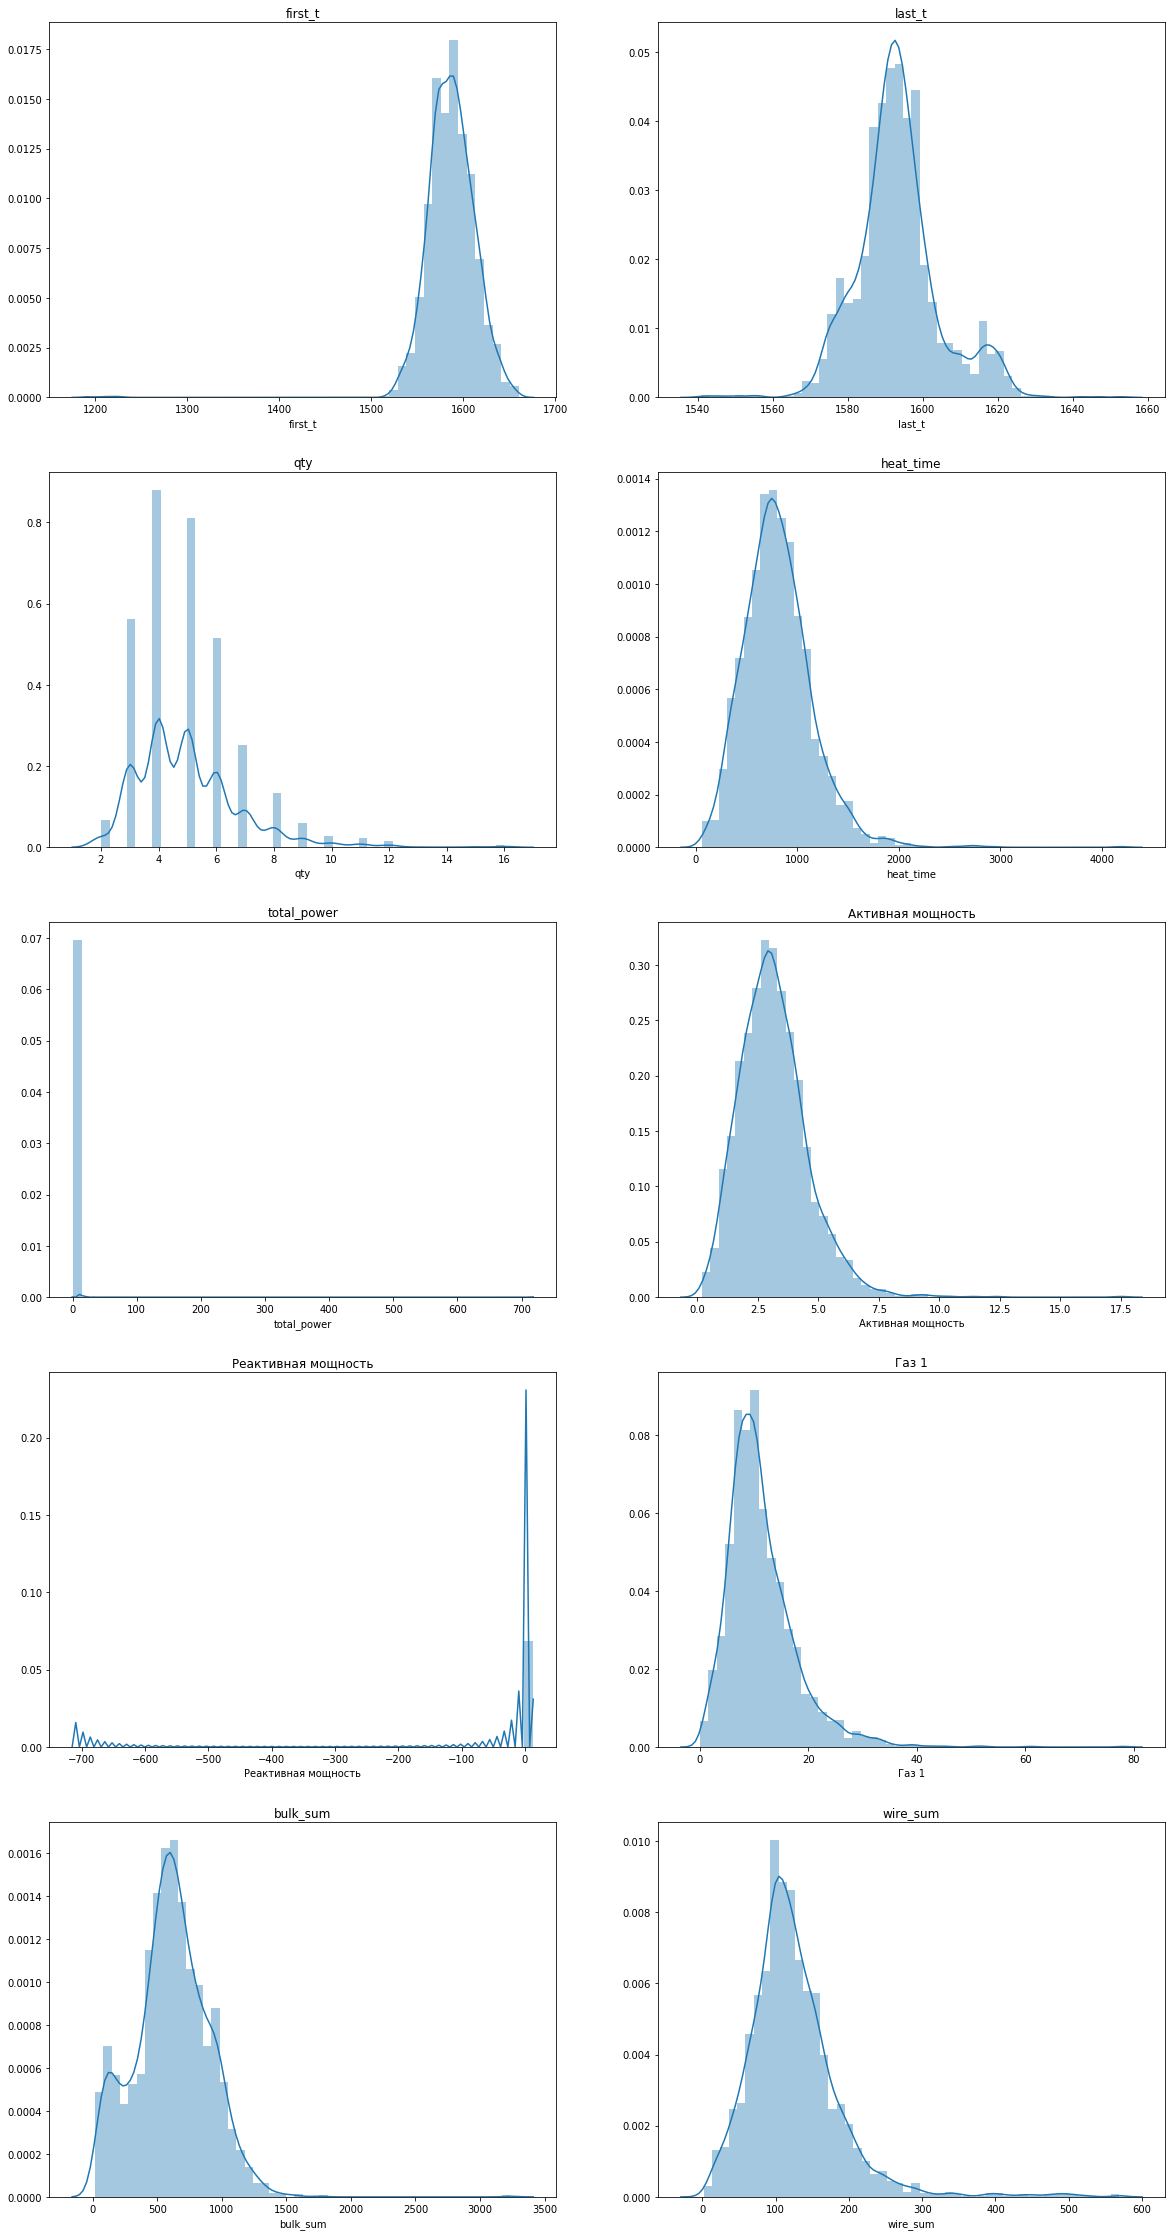

In [28]:
warnings.filterwarnings("ignore")

fig = plt.figure(figsize=(20,40))

count = 0
for i in col_list:
    count += 1
    fig.add_subplot(len(col_list)/2, 2, count, title=i)
    sns.distplot(data_short.dropna()[i])
    
plt.show()

Глядя на распределения потенциальных признаков, можно отметить следующее:
- в основном признаки имеют правильную форму распределения;
- суммарный bulk имеет 2 пика, что подтверждает его синтетическую природу (в будущем возможно его имеет смысл исключить из перечня признаков);
- форма распределения реактивной мощности далека от нормальной. Кроме того, при расчете суммарной мощности она вносит свой хаотический вклад в распределение активной мощности, приводя его к ненормальному виду. Вероятно, правильнее использовать активную мощность либо 2 вида мощности по отдельности;
- в большинстве партий 4-5 замеров температуры

2. Посмотрим на выбросы на ящиках с усами

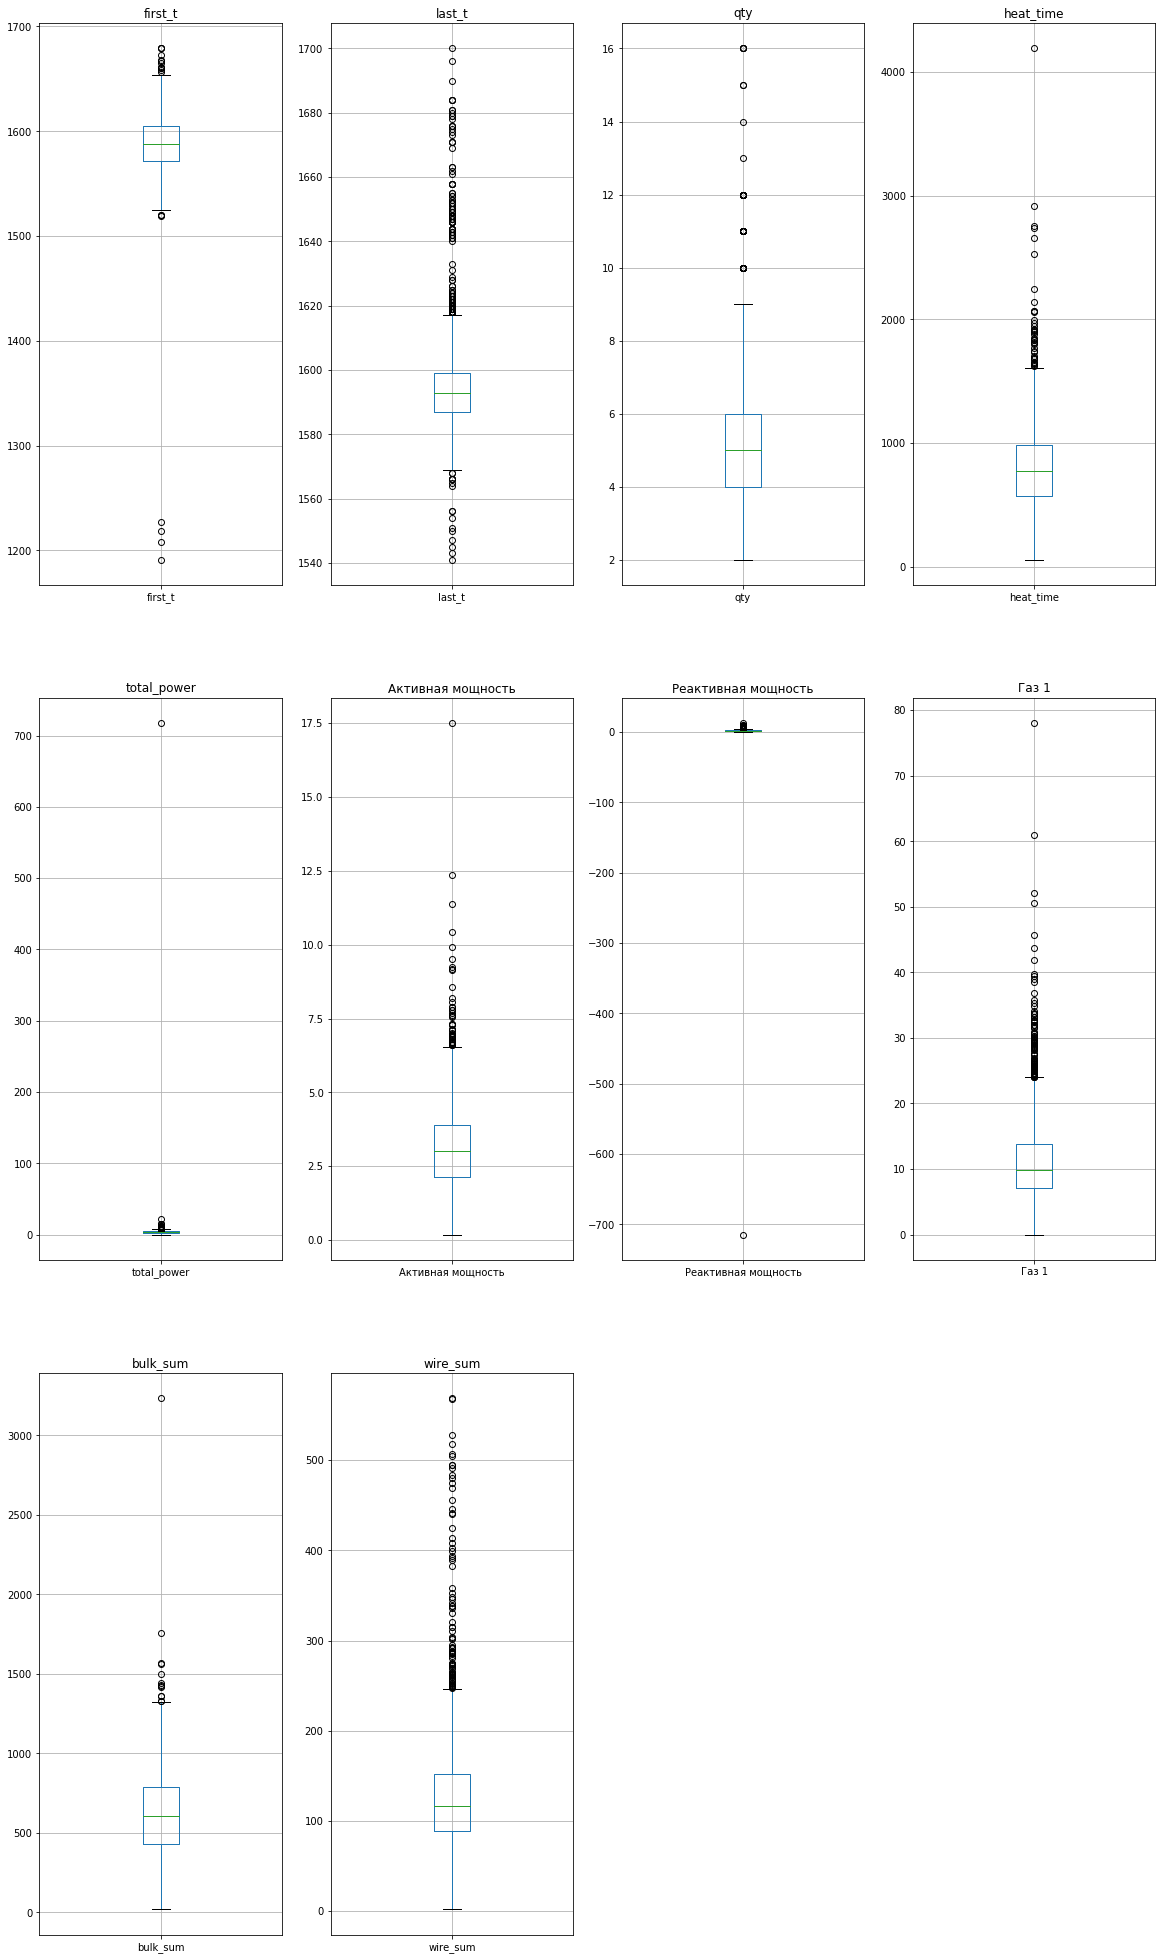

In [29]:
warnings.filterwarnings("ignore")

fig = plt.figure(figsize=(20,60))

count = 0
for i in col_list:
    count += 1
    fig.add_subplot(len(col_list)/2, 4, count, title=i)
    data_short.boxplot(column=[i])
plt.show()

Наблюдения по ящикам с усами:

- __Первая температура__: единичные выбросы при значениях ниже 1520, выбросы при значениях выше 1660

- __Последний замер температуры__: разброс значений шире. Единичные выбросы при температурах ниже 1570, большое количество значений при температуре выше 1615. При этом по таблице describe нельзя было сделать выводов о таком разбросе значений (медиана и среднее очень близки по значениям)

- __Время нагрева__: выбросы по значениям выше 1500 сек.

- Ящики с усами по __мощностям__ подтверждают предыдущие предположения: вероятно, лучше использовать для предсказаний Активную мощность либо 2 показателя отдельно.

- __По всем добавкам__ заметны выбросы сверху.


3. Построим матрицу корреляции, чтобы посмотреть, нет ли мультиколлинеарности между потенциальными признаками

In [30]:
data_short.drop(columns='key').corr()

,first_t,last_t,qty,heat_time,total_power,Активная мощность,Реактивная мощность,Газ 1,bulk_sum,wire_sum
first_t,1.000000,0.376621,0.095761,-0.295592,-0.046192,-0.325367,-0.016728,-0.001493,-0.101857,0.106997
last_t,0.376621,1.000000,0.044734,0.208171,0.005672,0.238150,0.035983,-0.033371,0.087849,0.060879
qty,0.095761,0.044734,1.000000,0.388283,0.033506,0.351697,0.037379,0.329837,0.148248,0.202991
heat_time,-0.295592,0.208171,0.388283,1.000000,0.099437,0.978183,0.093689,0.400405,0.544373,0.090871
total_power,-0.046192,0.005672,0.033506,0.099437,1.000000,0.104360,-0.980588,0.047263,0.047257,-0.006079
Активная мощность,-0.325367,0.238150,0.351697,0.978183,0.104360,1.000000,0.089585,0.375053,0.559891,0.089951
Реактивная мощность,-0.016728,0.035983,0.037379,0.093689,-0.980588,0.089585,1.000000,0.025511,0.057197,0.020896
Газ 1,-0.001493,-0.033371,0.329837,0.400405,0.047263,0.375053,0.025511,1.000000,0.319572,0.214879
bulk_sum,-0.101857,0.087849,0.148248,0.544373,0.047257,0.559891,0.057197,0.319572,1.000000,0.007197
wire_sum,0.106997,0.060879,0.202991,0.090871,-0.006079,0.089951,0.020896,0.214879,0.007197,1.000000


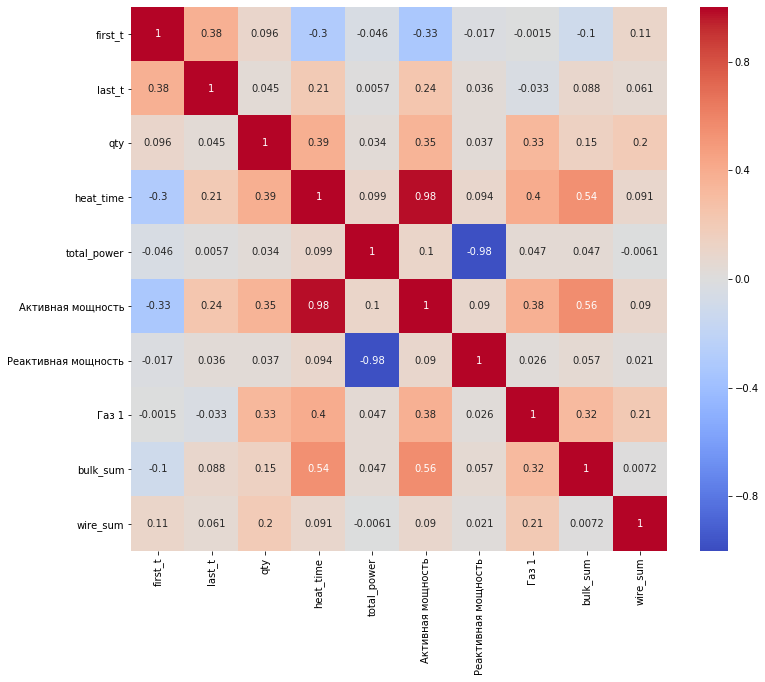

In [31]:
fig = plt.figure(figsize=(12,10))

sns.heatmap(data_short.drop(columns='key').corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

plt.show()

Очень высокая прямая линейная зависимость между временем нагрева и активной мощностью - при моделировании стоит оставить один из этих двух признаков.
Высокая обратная линейная - между общей мощностью и реактивной, что неудивительно, учитыая, что общую мы получали синтетически.

In [32]:
#fig = plt.figure(figsize=(20,60))
#sns.pairplot(data_short.drop(columns='key'))
#plt.show()

Данные исследованы, можно приступать к этапу подготовки датасетов для обучения моделей.

## Построение, выбор и улучшение модели

### Подготовка данных

Учитывая характер данных, будеем использовать регрессионные модели. Т.к. данные числовые и разного масштаба, до построения моделей нужно будет провести стандартизацию.

1. Раздделение на train, valid, test

In [33]:
df = data_short.set_index('key')

df_wide = data.set_index('key')

df_target = df['last_t']
df_features = df.drop(columns=['last_t'])

df_wide_target = df_wide['last_t']
df_wide_features = df_wide.drop(columns=['last_t'])

In [34]:
df_list = [df, df_target, df_features, df_wide, df_wide_target, df_wide_features]
for i in df_list:
    print(i.shape)

(2475, 10)
(2475,)
(2475, 9)
(2475, 34)
(2475,)
(2475, 33)


In [35]:
def split(features, target, test_size, random_state):
    features_train, features_test, target_train, target_test = train_test_split(
        df_features, df_target, test_size=test_size, random_state=random_state)
    print(features_train.shape)
    print(features_test.shape)
    print(target_train.shape)
    print(target_test.shape)
    return features_train, features_test, target_train, target_test
    

In [36]:
df_features_train, df_features_valid, df_target_train, df_target_valid = train_test_split(df_features.fillna(0), df_target, test_size=0.3, random_state=12345)
for i in [df_features_train, df_features_valid, df_target_train, df_target_valid]:
    print('Shape')
    print(i.shape)
    print('Nans')
    print(i.isna().sum().sum())
    print('')
    

Shape
(1732, 9)
Nans
0

Shape
(743, 9)
Nans
0

Shape
(1732,)
Nans
0

Shape
(743,)
Nans
0



In [37]:
df_features_val, df_features_test, df_target_val, df_target_test = train_test_split(df_features_valid, df_target_valid, test_size=0.5, random_state=12345)
for i in [df_features_val, df_features_test, df_target_val, df_target_test]:
    print('Shape')
    print(i.shape)
    print('Nans')
    print(i.isna().sum().sum())
    print('')

Shape
(371, 9)
Nans
0

Shape
(372, 9)
Nans
0

Shape
(371,)
Nans
0

Shape
(372,)
Nans
0



In [38]:
# аналогично, для широкого датасета

wide_features_train, wide_features_valid, wide_target_train, wide_target_valid = train_test_split(df_wide_features.fillna(0), df_wide_target, test_size=0.3, random_state=12345)
for i in [wide_features_train, wide_features_valid, wide_target_train, wide_target_valid]:
    print('Shape')
    print(i.shape)
    print('Nans')
    print(i.isna().sum().sum())
    print('')

Shape
(1732, 33)
Nans
0

Shape
(743, 33)
Nans
0

Shape
(1732,)
Nans
0

Shape
(743,)
Nans
0



In [39]:
wide_features_val, wide_features_test, wide_target_val, wide_target_test = train_test_split(wide_features_valid, wide_target_valid, test_size=0.5, random_state=12345)
for i in [wide_features_val, wide_features_test, wide_target_val, wide_target_test]:
    print('Shape')
    print(i.shape)
    print('Nans')
    print(i.isna().sum().sum())
    print('')

Shape
(371, 33)
Nans
0

Shape
(372, 33)
Nans
0

Shape
(371,)
Nans
0

Shape
(372,)
Nans
0



Выборки готовы. 

2. Проведем стандартизацию данных

In [40]:
scaler = StandardScaler()

scaler.fit(df_features_train)

df_features_train_scaled = pd.DataFrame(scaler.transform(df_features_train), columns = df_features_train.columns, index=df_features_train.index)

df_features_valid_scaled = pd.DataFrame(scaler.transform(df_features_val), columns = df_features_val.columns, index = df_features_val.index)

df_features_test_scaled = pd.DataFrame(scaler.transform(df_features_test), columns = df_features_test.columns, index = df_features_test.index)

for i in [df_features_train_scaled, df_features_valid_scaled, df_features_test_scaled]:
    print('Shape')
    print(i.shape)
    print('Nans')
    print(i.isna().sum().sum())
    print('')

Shape
(1732, 9)
Nans
0

Shape
(371, 9)
Nans
0

Shape
(372, 9)
Nans
0



In [41]:
#for i in [df_features_train, df_features_val, df_features_test]:
#    display(i.head(3))

In [42]:
for i in [df_features_train_scaled, df_features_valid_scaled, df_features_test_scaled]:
    display(i.head(2))

,first_t,qty,heat_time,total_power,Активная мощность,Реактивная мощность,Газ 1,bulk_sum,wire_sum
key,,,,,,,,,
1051,-1.103116,4.558922,3.545616,0.373232,4.250292,0.217242,0.827478,1.805595,0.012042
1173,-0.293431,-1.097276,-0.753900,-0.112540,-0.819673,-0.033447,-1.109197,-0.134409,-1.496496


,first_t,qty,heat_time,total_power,Активная мощность,Реактивная мощность,Газ 1,bulk_sum,wire_sum
key,,,,,,,,,
1143,0.386704,2.296443,0.497031,0.014071,0.269127,0.057861,0.301232,0.899809,0.280801
828,-0.520143,-0.531657,-0.118035,-0.021132,-0.017151,0.031055,0.489743,0.159633,-0.346969


,first_t,qty,heat_time,total_power,Активная мощность,Реактивная мощность,Газ 1,bulk_sum,wire_sum
key,,,,,,,,,
1312,-0.228656,-0.531657,-0.822240,-0.106673,-0.834431,-0.021911,0.075104,-0.350716,1.268359
254,0.548641,0.033963,1.040784,0.090065,1.193170,0.083769,0.945697,1.494653,0.743112


In [43]:
scaler = StandardScaler()

scaler.fit(wide_features_train)

wide_features_train_scaled = pd.DataFrame(scaler.transform(wide_features_train), columns = wide_features_train.columns, index = wide_features_train.index)

wide_features_valid_scaled = pd.DataFrame(scaler.transform(wide_features_val), columns = wide_features_val.columns, index=wide_features_val.index)

wide_features_test_scaled = pd.DataFrame(scaler.transform(wide_features_test), columns = wide_features_test.columns, index=wide_features_test.index)

for i in [wide_features_train_scaled, wide_features_valid_scaled, wide_features_test_scaled]:
    print('Shape')
    print(i.shape)
    print('Nans')
    print(i.isna().sum().sum())
    print('')

Shape
(1732, 33)
Nans
0

Shape
(371, 33)
Nans
0

Shape
(372, 33)
Nans
0



In [44]:
for i in [wide_features_train_scaled, wide_features_valid_scaled, wide_features_test_scaled]:
    display(i.head(2))

,first_t,qty,heat_time,total_power,Активная мощность,Реактивная мощность,Газ 1,Bulk 1,Bulk 2,Bulk 3,...,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9,wire_sum
key,,,,,,,,,,,,,,,,,,,,,
1051,-1.103116,4.558922,3.545616,0.373232,4.250292,0.217242,0.827478,-0.282308,-0.067658,-0.59316,...,0.491715,-0.534507,-0.104858,-0.05798,0.0,-0.1067,-0.035311,-0.075255,-0.102761,0.012042
1173,-0.293431,-1.097276,-0.753900,-0.112540,-0.819673,-0.033447,-1.109197,-0.282308,-0.067658,-0.59316,...,-1.651411,-0.534507,-0.104858,-0.05798,0.0,-0.1067,-0.035311,-0.075255,-0.102761,-1.496496


,first_t,qty,heat_time,total_power,Активная мощность,Реактивная мощность,Газ 1,Bulk 1,Bulk 2,Bulk 3,...,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9,wire_sum
key,,,,,,,,,,,,,,,,,,,,,
1143,0.386704,2.296443,0.497031,0.014071,0.269127,0.057861,0.301232,-0.282308,-0.067658,-0.59316,...,0.873531,-0.534507,-0.104858,-0.05798,0.0,-0.1067,-0.035311,-0.075255,-0.102761,0.280801
828,-0.520143,-0.531657,-0.118035,-0.021132,-0.017151,0.031055,0.489743,-0.282308,-0.067658,-0.25152,...,-0.592245,0.283087,-0.104858,-0.05798,0.0,-0.1067,-0.035311,-0.075255,-0.102761,-0.346969


,first_t,qty,heat_time,total_power,Активная мощность,Реактивная мощность,Газ 1,Bulk 1,Bulk 2,Bulk 3,...,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9,wire_sum
key,,,,,,,,,,,,,,,,,,,,,
1312,-0.228656,-0.531657,-0.822240,-0.106673,-0.834431,-0.021911,0.075104,-0.282308,-0.067658,0.131117,...,1.107579,1.130726,-0.104858,-0.05798,0.0,-0.1067,-0.035311,-0.075255,-0.102761,1.268359
254,0.548641,0.033963,1.040784,0.090065,1.193170,0.083769,0.945697,2.041146,-0.067658,-0.593160,...,1.530320,-0.534507,-0.104858,-0.05798,0.0,-0.1067,-0.035311,-0.075255,-0.102761,0.743112


Данные подготовлены, стандартизация проведена, размеры датасетов проверены. Можно приступать к первичному выбору модели.

### Выбор модели

Исследуем базовые регрессионные модели LinearRegression, DecisionTreeRegressor, RandomForestRegressor и LightGBM, в качестве метрики качества - MAE 

In [45]:
def scores(model, features_train, target_train, features_valid, target_valid):
    model = model()
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    mae = mean_absolute_error(target_valid, predictions_valid)
    print('')
    print(type(model).__name__)
    print('MAE:', mae)
    print('')
    

1. На выборках с меньшим числом признаков до стандартизации

In [46]:
%%time

warnings.simplefilter(action='ignore', category=FutureWarning)

for model in [LinearRegression, DecisionTreeRegressor, RandomForestRegressor]:
    scores(model, df_features_train, df_target_train, df_features_val,  df_target_val)


LinearRegression
MAE: 7.980467917074097


DecisionTreeRegressor
MAE: 8.722371967654986


RandomForestRegressor
MAE: 6.936657681940702

Wall time: 140 ms


Лучший  МАЕ на узком датасете до стандартизации у RandomForestRegressor:
MAE: 6.758221024258758

2.  На выборках с большим числом признаков до стандартизации

In [47]:
%%time

warnings.simplefilter(action='ignore', category=FutureWarning)

for model in [LinearRegression, DecisionTreeRegressor, RandomForestRegressor]:
    scores(model, wide_features_train, wide_target_train, wide_features_val,  wide_target_val)


LinearRegression
MAE: 7.961964273233789


DecisionTreeRegressor
MAE: 8.703504043126685


RandomForestRegressor
MAE: 6.554177897574127

Wall time: 218 ms


Лучший  МАЕ на широком датасете до стандартизации у RandomForestRegressor:
MAE: 6.654986522911051 (незначительно уменьшился)

3. На выборках с меньшим числом признаков после стандартизации

In [48]:
%%time

warnings.simplefilter(action='ignore', category=FutureWarning)

for model in [LinearRegression, DecisionTreeRegressor, RandomForestRegressor]:
    scores(model, df_features_train_scaled, df_target_train, df_features_valid_scaled,  df_target_val)


LinearRegression
MAE: 7.980467917074132


DecisionTreeRegressor
MAE: 8.800539083557952


RandomForestRegressor
MAE: 6.7078167115902865

Wall time: 147 ms


4. На выборках с большим числом признаков после стандартизации

In [49]:
%%time

warnings.simplefilter(action='ignore', category=FutureWarning)

for model in [LinearRegression, DecisionTreeRegressor, RandomForestRegressor]:
    scores(model, wide_features_train_scaled, wide_target_train, wide_features_valid_scaled,  wide_target_val)


LinearRegression
MAE: 7.9619642732338125


DecisionTreeRegressor
MAE: 8.622641509433961


RandomForestRegressor
MAE: 6.741239892183286

Wall time: 278 ms


После стандартизации метрики ухудшились.

Посмотрим на регрессию в градиентном бустинге LightGBM широкий датасет до стандартизации.

In [50]:
#!pip3 install lightgbm

In [51]:
%%time

train_data = lgb.Dataset(wide_features_train, wide_target_train)

test_data = lgb.Dataset(wide_features_val, wide_target_val)

Wall time: 0 ns


In [52]:
param = {'objective': 'regression'}
param['metric'] = ['mae']

In [53]:
%%time
num_round = 100
bst = lgb.train(param, train_data, num_round, valid_sets=[test_data])

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001067 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3310
[LightGBM] [Info] Number of data points in the train set: 1732, number of used features: 24
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 1595.456697
[1]	valid_0's l1: 9.55353
[2]	valid_0's l1: 9.14765
[3]	valid_0's l1: 8.77497
[4]	valid_0's l1: 8.45833
[5]	valid_0's l1: 8.16291
[6]	valid_0's l1: 7.86848
[7]	valid_0's l1: 7.62862
[8]	valid_0's l1: 7.48955
[9]	valid_0's l1: 7.32239
[10]	valid_0's l1: 7.15292
[11]	valid_0's l1: 7.02478
[12]	valid_0's l1: 6.89936
[13]	valid_0's l1: 6.80097
[14]	valid_0's l1: 6.68291
[15]	valid_0's l1: 6.60392
[16]	valid_0's l1: 6.54103
[17]	valid_0's l1: 6.49996
[18]	valid_0's l1: 6.41799
[19]	valid_0's l

На 80 итерации MAE 5,90, что значительно ниже, чем у базовых моделей! Рассчитаем метрику на тестовом датасете. При этом наименьший МАЕ - на 63 итерации.

In [54]:
num_round = 63
bst = lgb.train(param, train_data, num_round, valid_sets=[test_data])

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000578 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3310
[LightGBM] [Info] Number of data points in the train set: 1732, number of used features: 24
[LightGBM] [Info] Start training from score 1595.456697
[1]	valid_0's l1: 9.55353
[2]	valid_0's l1: 9.14765
[3]	valid_0's l1: 8.77497
[4]	valid_0's l1: 8.45833
[5]	valid_0's l1: 8.16291
[6]	valid_0's l1: 7.86848
[7]	valid_0's l1: 7.62862
[8]	valid_0's l1: 7.48955
[9]	valid_0's l1: 7.32239
[10]	valid_0's l1: 7.15292
[11]	valid_0's l1: 7.02478
[12]	valid_0's l1: 6.89936
[13]	valid_0's l1: 6.80097
[14]	valid_0's l1: 6.68291
[15]	valid_0's l1: 6.60392
[16]	valid_0's l1: 6.54103
[17]	valid_0's l1: 6.49996
[18]	valid_0's l1: 6.41799
[19]	valid_0's l1: 6.37115
[20]	

In [55]:
ypred = bst.predict(wide_features_test)

print("MAE тестовой выборки lightGBM: ", mean_absolute_error(wide_target_test, ypred))

MAE тестовой выборки lightGBM:  6.481672580254732


На тестовой выборке результат  значительно хуже. Попробуем прогнать через алгоритм стандартизированный набор и узкий датасет

In [56]:
# стандартизированные данные
train_data = lgb.Dataset(wide_features_train_scaled, wide_target_train)

test_data = lgb.Dataset(wide_features_valid_scaled, wide_target_val)

param = {'objective': 'regression'}
param['metric'] = ['mae']

num_round = 100
bst = lgb.train(param, train_data, num_round, valid_sets=[test_data])

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000566 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3246
[LightGBM] [Info] Number of data points in the train set: 1732, number of used features: 24
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 1595.456697
[1]	valid_0's l1: 9.55071
[2]	valid_0's l1: 9.15446
[3]	valid_0's l1: 8.80413
[4]	valid_0's l1: 8.49938
[5]	valid_0's l1: 8.19573
[6]	valid_0's l1: 7.96488
[7]	valid_0's l1: 7.77514
[8]	valid_0's l1: 7.5597
[9]	valid_0's l1: 7.38542
[10]	valid_0's l1: 7.24155
[11]	valid_0's l1: 7.0863
[12]	valid_0's l1: 6.94785
[13]	valid_0's l1: 6.82533
[14]	valid_0's l1: 6.72261
[15]	valid_0's l1: 6.6376
[16]	valid_0's l1: 6.59924
[17]	valid_0's l1: 6.53151
[18]	valid_0's l1: 6.47747
[19]	valid_0's l1: 

In [57]:
# усеченный датасет
train_data = lgb.Dataset(df_features_train, df_target_train)

test_data = lgb.Dataset(df_features_val, df_target_val)

param = {'objective': 'regression'}
param['metric'] = ['mae']

num_round = 100
bst = lgb.train(param, train_data, num_round, valid_sets=[test_data])

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000226 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1916
[LightGBM] [Info] Number of data points in the train set: 1732, number of used features: 9
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 1595.456697
[1]	valid_0's l1: 9.55192
[2]	valid_0's l1: 9.12495
[3]	valid_0's l1: 8.75125
[4]	valid_0's l1: 8.45008
[5]	valid_0's l1: 8.17815
[6]	valid_0's l1: 7.89965
[7]	valid_0's l1: 7.6775
[8]	valid_0's l1: 7.47668
[9]	valid_0's l1: 7.31219
[10]	valid_0's l1: 7.17685
[11]	valid_0's l1: 7.07898
[12]	valid_0's l1: 6.96489
[13]	valid_0's l1: 6.89968
[14]	valid_0's l1: 6.80774
[15]	valid_0's l1: 6.73822
[16]	valid_0's l1: 6.6976
[17]	valid_0's l1: 6.63835
[18]	valid_0's l1: 6.58146
[19]	valid_0's l1: 

В обоих случаях результаты хуже. Вернемся к случайному лесу, изучим значимость признаков и далее попробуем менять параметры и используемые признаки.

Пока считаем, что у нас 2 альтернативные модели: случайный лес и lightGBM.

### Изучение features_importances

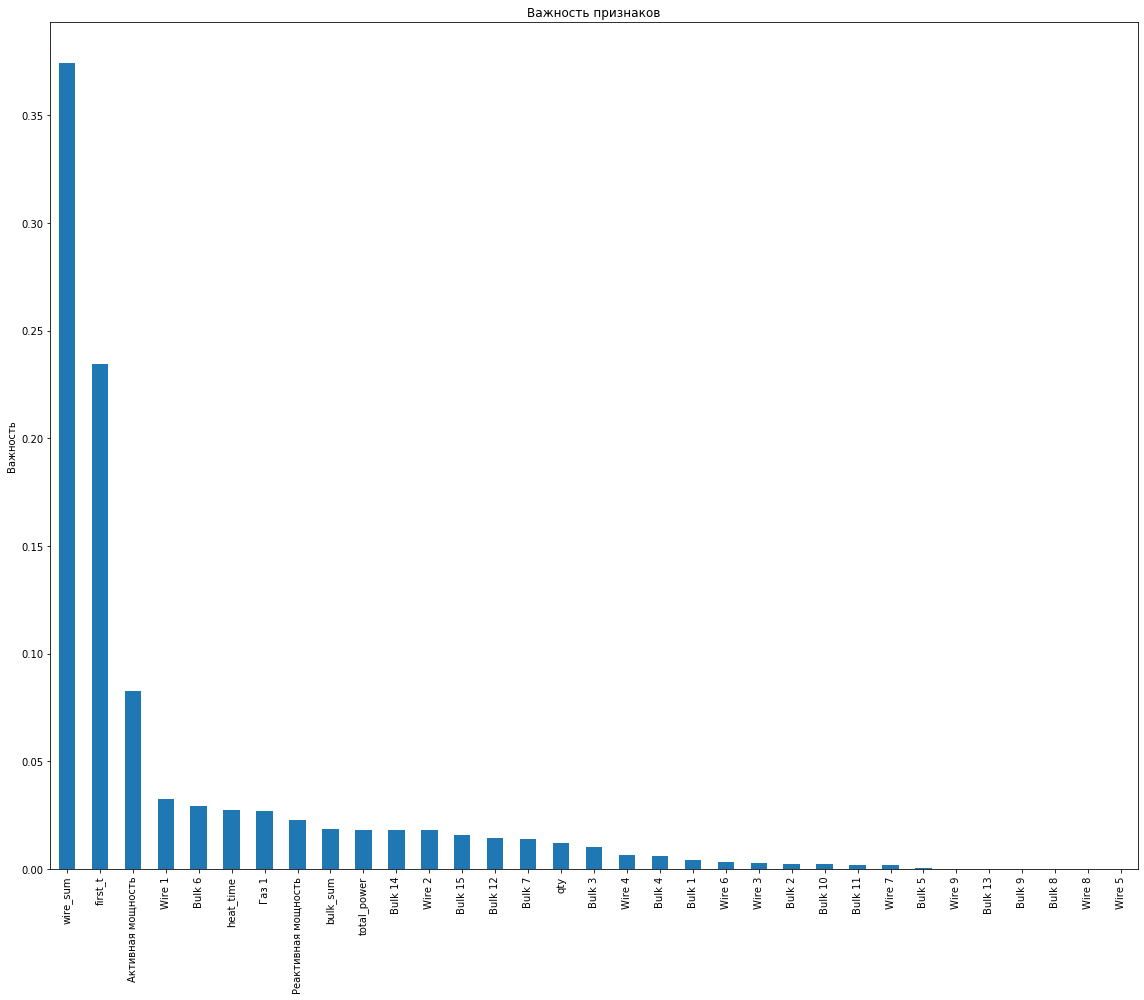

In [58]:
model = RandomForestRegressor()

model.fit(X = df_wide_features.fillna(0),
                   y = df_wide_target)

df_wide_imp = pd.Series(model.feature_importances_,
                         df_wide_features.columns)

fig, ax = plt.subplots(figsize=(16,14))
df_wide_imp.sort_values(ascending=False).plot.bar(ax=ax)
ax.set_title("Важность признаков")
ax.set_ylabel('Важность')
fig.tight_layout()

Попробуем оставить в датасете только следующие признаки (с учетом убывания их важности):
'wire_sum', 'first_t', 'Активная мощность'

In [59]:
features_short = df_wide_features[['wire_sum', 'first_t', 'Активная мощность']].fillna(0)
info(features_short)

,wire_sum,first_t,Активная мощность
key,,,
1,60.059998,1571.0,4.878147
2,96.052315,1581.0,3.052598
3,91.160157,1596.0,2.525882
4,89.063515,1601.0,3.209250
5,98.352796,1576.0,3.347173



<class 'pandas.core.frame.DataFrame'>
Int64Index: 2475 entries, 1 to 2499
Data columns (total 3 columns):
wire_sum             2475 non-null float64
first_t              2475 non-null float64
Активная мощность    2475 non-null float64
dtypes: float64(3)
memory usage: 77.3 KB
None


Число дубликатов 0

Число пропусков
Активная мощность    0
first_t              0
wire_sum             0
dtype: int64

Всего пропусков
0



,count,mean,std,min,25%,50%,75%,max
wire_sum,2475.0,120.071526,67.514323,0.000000,82.283760,114.145203,150.238400,568.777664
first_t,2475.0,1588.402020,29.243044,1191.000000,1572.000000,1588.000000,1605.000000,1679.000000
Активная мощность,2475.0,3.127628,1.425832,0.186226,2.148302,3.016373,3.908051,17.496497


(2475, 3)

In [60]:
short_features_train, short_features_valid, short_target_train, short_target_valid = train_test_split(features_short, df_wide_target, test_size=0.3, random_state=12345)
for i in [short_features_train, short_features_valid, short_target_train, short_target_valid]:
    print('Shape')
    print(i.shape)
    print('Nans')
    print(i.isna().sum().sum())
    print('')

Shape
(1732, 3)
Nans
0

Shape
(743, 3)
Nans
0

Shape
(1732,)
Nans
0

Shape
(743,)
Nans
0



In [61]:
short_val, short_test, short_target_val, short_target_test = train_test_split(short_features_valid, short_target_valid, test_size=0.5, random_state=12345)
for i in [short_val, short_test, short_target_val, short_target_test]:
    print('Shape')
    print(i.shape)
    print('Nans')
    print(i.isna().sum().sum())
    print('')

Shape
(371, 3)
Nans
0

Shape
(372, 3)
Nans
0

Shape
(371,)
Nans
0

Shape
(372,)
Nans
0



In [62]:
model = RandomForestRegressor()
model.fit(short_features_train, short_target_train)
predictions_valid = model.predict(short_val)

mae = mean_absolute_error(short_target_val, predictions_valid)
print('MAE:', mae)


MAE: 6.966576819407007


In [63]:
scaler = StandardScaler()

scaler.fit(short_features_train)

short_train_scaled = pd.DataFrame(scaler.transform(short_features_train), columns = short_features_train.columns, index=short_features_train.index)

short_valid_scaled = pd.DataFrame(scaler.transform(short_val), columns = short_val.columns, index = short_val.index)

short_test_scaled = pd.DataFrame(scaler.transform(short_test), columns = short_test.columns, index = short_test.index)

for i in [short_train_scaled, short_valid_scaled, short_test_scaled]:
    print('Shape')
    print(i.shape)
    print('Nans')
    print(i.isna().sum().sum())
    print('')

Shape
(1732, 3)
Nans
0

Shape
(371, 3)
Nans
0

Shape
(372, 3)
Nans
0



In [64]:
model = RandomForestRegressor()
model.fit(short_train_scaled, short_target_train)
predictions_valid = model.predict(short_val)

mae = mean_absolute_error(short_target_val, predictions_valid)
print('MAE:', mae)

MAE: 12.096495956873339


После редуцирования датасета стало значительно хуже! Более того, видно, что стандартизация негативно влияет на предасказания.

Попробуем взять 15 наиболее важных признаков и построить модели на них. Стандартизировать данные не будем. Заодно удалим пропуски и отрицательную мощность

In [65]:
col_list = df_wide_imp.sort_values(ascending = False).head(15).index
df_wide_droped = df_wide[df_wide['Реактивная мощность'] >= 0].dropna()

features_mid = df_wide_droped[col_list]
target_mid = df_wide_droped['last_t']


In [66]:
mid_features_train, mid_features_valid, mid_target_train, mid_target_valid = train_test_split(features_mid, target_mid, test_size=0.3, random_state=12345)

mid_val, mid_test, mid_target_val, mid_target_test = train_test_split(mid_features_valid, mid_target_valid, test_size=0.5, random_state=12345)
for i in [mid_features_train, mid_target_train, mid_val, mid_target_val, mid_test, mid_target_test]:
    print('Shape')
    print(i.shape)
    print('Nans')
    print(i.isna().sum().sum())
    print('')
    

Shape
(1629, 15)
Nans
0

Shape
(1629,)
Nans
0

Shape
(349, 15)
Nans
0

Shape
(349,)
Nans
0

Shape
(350, 15)
Nans
0

Shape
(350,)
Nans
0



In [67]:
warnings.simplefilter(action='ignore', category=FutureWarning)

for model in [LinearRegression, DecisionTreeRegressor, RandomForestRegressor]:
    scores(model, mid_features_train, mid_target_train, mid_val,  mid_target_val)
    


LinearRegression
MAE: 6.300667149263693


DecisionTreeRegressor
MAE: 8.303724928366762


RandomForestRegressor
MAE: 6.5352435530085975



Значение метрик относительно широкого датасета стало хуже, но удаление пропусков оказало положительное влияние! Кроме того, линейная регрессия показала себя лучше. Запустим по этому датасету lightGBM.

In [68]:
train_data = lgb.Dataset(mid_features_train, mid_target_train)

test_data = lgb.Dataset(mid_val, mid_target_val)

param = {'objective': 'regression'}
param['metric'] = ['mae']

num_round = 100
bst = lgb.train(param, train_data, num_round, valid_sets=[test_data])

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000380 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2885
[LightGBM] [Info] Number of data points in the train set: 1629, number of used features: 14
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 1593.505218
[1]	valid_0's l1: 7.91405
[2]	valid_0's l1: 7.67636
[3]	valid_0's l1: 7.4767
[4]	valid_0's l1: 7.3265
[5]	valid_0's l1: 7.17875
[6]	valid_0's l1: 7.08026
[7]	valid_0's l1: 6.95514
[8]	valid_0's l1: 6.84572
[9]	valid_0's l1: 6.73965
[10]	valid_0's l1: 6.66597
[11]	valid_0's l1: 6.58319
[12]	valid_0's l1: 6.49246
[13]	valid_0's l1: 6.45651
[14]	valid_0's l1: 6.39607
[15]	valid_0's l1: 6.37834
[16]	valid_0's l1: 6.32165
[17]	valid_0's l1: 6.27291
[18]	valid_0's l1: 6.24375
[19]	valid_0's l1:

Чуда не произошло. Оставим в покое lightGBM, вернемся к исходному широкому датасету, удалим в нем пропуски и отрицательную мощность, рассчитаем еще раз MAE базовых моделей и решим, с какой моделью экспериментировать в части подбора параметров.

In [69]:
df_wide_upd = df_wide[df_wide['Реактивная мощность'] >= 0].dropna()

features_upd = df_wide_upd.drop(columns='last_t')
target_upd = df_wide_upd['last_t']

features_upd.shape

(2328, 33)

In [70]:
upd_features_train, upd_features_valid, upd_target_train, upd_target_valid = train_test_split(features_upd, target_upd, test_size=0.3, random_state=12345)

upd_val, upd_test, upd_target_val, upd_target_test = train_test_split(upd_features_valid, upd_target_valid, test_size=0.5, random_state=12345)
for i in [upd_features_train, upd_target_train, upd_val, upd_target_val, upd_test, upd_target_test]:
    print('Shape')
    print(i.shape)
    print('Nans')
    print(i.isna().sum().sum())
    print('')

Shape
(1629, 33)
Nans
0

Shape
(1629,)
Nans
0

Shape
(349, 33)
Nans
0

Shape
(349,)
Nans
0

Shape
(350, 33)
Nans
0

Shape
(350,)
Nans
0



In [71]:
warnings.simplefilter(action='ignore', category=FutureWarning)

for model in [LinearRegression, DecisionTreeRegressor, RandomForestRegressor]:
    scores(model, upd_features_train, upd_target_train, upd_val,  upd_target_val)


LinearRegression
MAE: 6.35477640390434


DecisionTreeRegressor
MAE: 8.255014326647565


RandomForestRegressor
MAE: 6.334670487106018



Получили близкие значения для линейной регрессии и случайного леса. Запустим на той же выборке еще несколько регрессионных моделей

In [72]:
regressors = [
    KNeighborsRegressor(),
    GradientBoostingRegressor(),
    KNeighborsRegressor(),
    ExtraTreesRegressor(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    LinearRegression(),
    Lasso(),
    Ridge()
]

In [73]:
head = 10
for model in regressors[:head]:
    start = time()
    model.fit(upd_features_train, upd_target_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(upd_val)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    
    print("\tMean absolute error:", mean_absolute_error(upd_target_val, y_pred))
    print()

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')
	Training time: 0.004s
	Prediction time: 0.009s
	Mean absolute error: 7.525501432664753

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
	Training time: 0.219s
	Prediction time: 0.002s
	Mean absolute error: 5.8926991861

Градиентный бустинг дал MAE ниже 6. Проверим, какое значение получится на тестовой выборке

In [74]:
model = GradientBoostingRegressor()
start = time()
model.fit(upd_features_train, upd_target_train)
train_time = time() - start
start = time()
y_pred = model.predict(upd_test)
predict_time = time()-start    
print(model)
print("\tTraining time: %0.3fs" % train_time)
print("\tPrediction time: %0.3fs" % predict_time)
    
print("\tMean absolute error:", mean_absolute_error(upd_target_test, y_pred))


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
	Training time: 0.215s
	Prediction time: 0.002s
	Mean absolute error: 5.897730050138099


Ларчик просто открывался! Наша __лучшая модель - GradientBoostingRegressor!__ MAE на ней с параметрами по умолчанию - 5,86, что соответствует искомому значению.

Попробуем улучшить результат, меняя параметры в GridSearchCV

### Подбор параметров лучшей модели с GridSearchCv

In [75]:
gbr = GradientBoostingRegressor()

parametrs = {'learning_rate': [0.01, 0.1, 0.5],
                  'subsample'    : [1, 0.5, 0.1],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [3, 6, 9]
                 }

%%time
grid = GridSearchCV(gbr, parametrs, cv=5)
grid.fit(upd_features_train, upd_target_train)

grid.best_params_

Результат работы GridSearch: {'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 1000, 'subsample': 0.5},
Wall time: 17min 56s

In [76]:
model = GradientBoostingRegressor(learning_rate=0.01, max_depth=9, n_estimators=1000, subsample=0.5)
start = time()
model.fit(upd_features_train, upd_target_train)
train_time = time() - start
start = time()
y_pred_valid = model.predict(upd_val)
y_pred_test = model.predict(upd_test)
predict_time = time()-start    
print(model)
print("\tTraining time: %0.3fs" % train_time)
print("\tPrediction time: %0.3fs" % predict_time)

print("\tMAE val:", mean_absolute_error(upd_target_val, y_pred_valid))
print("\tMAE test:", mean_absolute_error(upd_target_test, y_pred_test))


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=9,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=0.5, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
	Training time: 8.717s
	Prediction time: 0.047s
	MAE val: 6.03588171251361
	MAE test: 5.8822673934479095


МАЕ на тестовой выборке с параметрами, подобранными grid-ом, чуть хуже, чем параметры по умолчанию. Однако полученное значение (5.8684) тоже удовлетворяет запросу заказчика.

### Сравнение с константной моделью

Анализ будет неполным, если не сравнить результат с константной моделью. В качестве константной модели возьмем медианные значения.

In [77]:
%%time

predicted_constant = pd.Series(upd_target_train.median(), index = df_target_valid)

mae_constant = mean_absolute_error(df_target_valid, predicted_constant)
print('MAE константной модели', mae_constant)

MAE константной модели 9.600269179004037
Wall time: 6.98 ms


МАЕ константной модели (9.6) почти вдвое хуже метрики выбранной лучшей модели - предсказание нашей модели можно считать удовлетворительным. 

## Выводы

В результате исследования было проведено большое количество манипуляций с данными для поиска оптимального набора признаков. Им оказался датасет со всеми первоначальными признаками без пропусков.

На этапе выбора лучшей модели также было проанализировано большое количество измерений. Лучшей себя показала регрессионная модель градиентного бустинга GradientBoostingRegressor c дефолтными параметрами Training time: 0.707s Prediction time: 0.002s МАЕ = от 5.86 до 5.88 (без random_state).

Сравнение с константной моделью подтвердило, что модель работает лучше случайной.

Можно считать, что поставленная задача выполнена успешно.